Recordar consultar el [Diccionario de datos](./Datasets/Google%20Maps/Diccionario%20de%20datos.docx)


# Importaciones

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

# Llamado de datos a dataframes

In [2]:
df_maps_restaurantes = pd.read_parquet(r'Generated\Google\metada_sitios.parquet')
df_maps_reviews = pd.read_parquet(r'Generated\Google\merge_site_reviews.parquet')
df_yelp_restaurantes = pd.read_parquet(r'Generated\Yelp\bussines.parquet')
df_yelp_checkin = pd.read_parquet(r'Generated\YELP\business_checkin.parquet')
df_yelp_tips = pd.read_parquet(r'Generated\Yelp\business_tip.parquet')
df_yelp_reviews = pd.read_parquet(r'Generated\Yelp\review.parquet')
df_yelp_users = pd.read_parquet(r'Generated\Yelp\users_extracted.parquet')

In [3]:
df_maps_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212014 entries, 0 to 212013
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              212014 non-null  object 
 1   address           210956 non-null  object 
 2   gmap_id           212014 non-null  object 
 3   description       72392 non-null   object 
 4   latitude          212014 non-null  float64
 5   longitude         212014 non-null  float64
 6   category          212014 non-null  object 
 7   avg_rating        212014 non-null  float64
 8   num_of_reviews    212014 non-null  int64  
 9   price             100000 non-null  object 
 10  hours             189913 non-null  object 
 11  MISC              210599 non-null  object 
 12  state             190751 non-null  object 
 13  relative_results  170957 non-null  object 
 14  url               212014 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 24.3+ MB


In [4]:
df_maps_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2393452 entries, 0 to 2393451
Data columns (total 26 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   name_x            object 
 2   time              int64  
 3   rating            int64  
 4   text              object 
 5   pics              object 
 6   resp              object 
 7   gmap_id           object 
 8   anio              int64  
 9   estado            object 
 10  name_y            object 
 11  address           object 
 12  description       object 
 13  latitude          float64
 14  longitude         float64
 15  category          object 
 16  avg_rating        float64
 17  num_of_reviews    int64  
 18  price             object 
 19  hours             object 
 20  MISC              object 
 21  state             object 
 22  relative_results  object 
 23  url               object 
 24  state_ab          object 
 25  us_state          object 
dtypes: float64(3),

In [5]:
df_yelp_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22685 entries, 3 to 150339
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   22685 non-null  object 
 1   name          22685 non-null  object 
 2   address       22685 non-null  object 
 3   city          22685 non-null  object 
 4   state         22685 non-null  object 
 5   postal_code   22685 non-null  object 
 6   latitude      22685 non-null  float64
 7   longitude     22685 non-null  float64
 8   stars         22685 non-null  float64
 9   review_count  22685 non-null  int64  
 10  is_open       22685 non-null  int64  
 11  attributes    22429 non-null  object 
 12  categories    22685 non-null  object 
 13  hours         19504 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 2.6+ MB


In [6]:
df_yelp_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330 entries, 0 to 3329
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   3330 non-null   object 
 1   name          3330 non-null   object 
 2   address       3330 non-null   object 
 3   city          3330 non-null   object 
 4   state         3330 non-null   object 
 5   postal_code   3330 non-null   object 
 6   latitude      3330 non-null   float64
 7   longitude     3330 non-null   float64
 8   stars         3330 non-null   float64
 9   review_count  3330 non-null   int64  
 10  is_open       3330 non-null   int64  
 11  attributes    3296 non-null   object 
 12  categories    3330 non-null   object 
 13  hours         3082 non-null   object 
 14  date          3330 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 390.4+ KB


In [7]:
df_yelp_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69346 entries, 0 to 69345
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           69346 non-null  object 
 1   business_id       69346 non-null  object 
 2   text              69346 non-null  object 
 3   date              69346 non-null  object 
 4   compliment_count  69346 non-null  int64  
 5   name              69346 non-null  object 
 6   address           69346 non-null  object 
 7   city              69346 non-null  object 
 8   state             69346 non-null  object 
 9   postal_code       69346 non-null  object 
 10  latitude          69346 non-null  float64
 11  longitude         69346 non-null  float64
 12  stars             69346 non-null  float64
 13  review_count      69346 non-null  int64  
 14  is_open           69346 non-null  int64  
 15  attributes        69301 non-null  object 
 16  categories        69346 non-null  object

In [8]:
df_yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558655 entries, 0 to 558654
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    558655 non-null  object
 1   user_id      558655 non-null  object
 2   business_id  558655 non-null  object
 3   stars        558655 non-null  int8  
 4   funny        558655 non-null  int8  
 5   cool         558655 non-null  int8  
 6   text         558655 non-null  object
 7   date         558655 non-null  object
dtypes: int8(3), object(5)
memory usage: 22.9+ MB


In [9]:
df_yelp_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99015 entries, 0 to 99014
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             99015 non-null  object 
 1   name                99015 non-null  object 
 2   review_count        99015 non-null  int64  
 3   yelping_since       99015 non-null  object 
 4   useful              99015 non-null  int64  
 5   funny               99015 non-null  int64  
 6   cool                99015 non-null  int64  
 7   elite               99015 non-null  object 
 8   friends             99015 non-null  object 
 9   fans                99015 non-null  int64  
 10  average_stars       99015 non-null  float64
 11  compliment_hot      99015 non-null  int64  
 12  compliment_more     99015 non-null  int64  
 13  compliment_profile  99015 non-null  int64  
 14  compliment_cute     99015 non-null  int64  
 15  compliment_list     99015 non-null  int64  
 16  comp

# Verificacion de valores nulos

Visualizamos los valores nulos de manera grafica con un mapa de calor

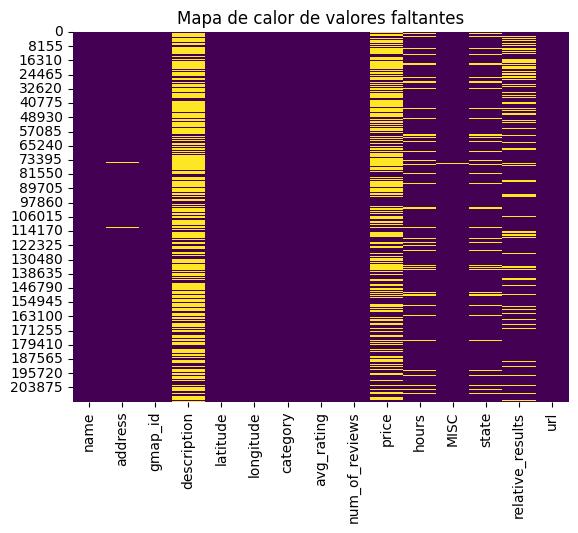

In [10]:
sns.heatmap(df_maps_restaurantes.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de calor de valores faltantes')
plt.show()

Analizamos el porcentaje de valores nulos presentes en cada columna

In [11]:
porcnull_rest = df_maps_restaurantes.isnull().mean() * 100
columnasnull_rest = porcnull_rest[porcnull_rest > 0]
columnasnull_rest

address              0.499024
description         65.855085
price               52.833303
hours               10.424312
MISC                 0.667409
state               10.029055
relative_results    19.365231
dtype: float64

Desechamos las columnas irrelevantes con un porcentaje alto de valores nulos 

In [12]:
df_maps_rest_mod = df_maps_restaurantes.drop(['description','price'],axis=1)

Se rellenan los valores nulos 

In [13]:
df_maps_rest_mod['hours'] = df_maps_rest_mod['hours'].fillna("").apply(list)
df_maps_rest_mod['state'].fillna(value='N/A',inplace=True)
df_maps_rest_mod['address'].fillna(value='N/A',inplace=True)
df_maps_rest_mod['MISC'] = df_maps_rest_mod['MISC'].fillna("").apply(dict)
df_maps_rest_mod['relative_results'] = df_maps_rest_mod['relative_results'].fillna("").apply(list)

Se verifica la ausencia de valores nulos

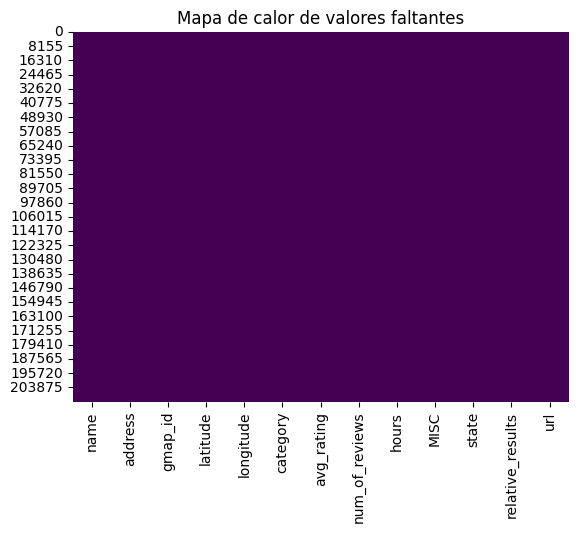

In [14]:
sns.heatmap(df_maps_rest_mod.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de calor de valores faltantes')
plt.show()

Se realiza el mismo procedimiento

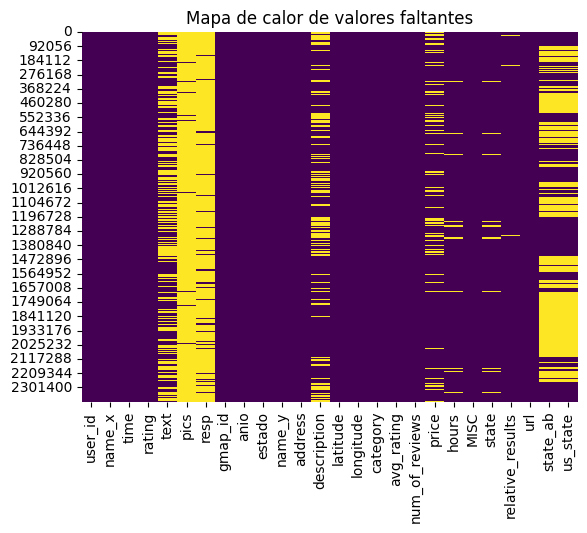

In [15]:
sns.heatmap(df_maps_reviews.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de calor de valores faltantes')
plt.show()

In [16]:
porcnull_review = df_maps_reviews.isnull().mean() * 100
columnasnull_review = porcnull_review[porcnull_review > 0]
columnasnull_review

text                41.998503
pics                96.393661
resp                91.000112
address              0.038522
description         26.820885
price               13.627639
hours                2.670954
MISC                 0.232760
state                2.571516
relative_results     0.482023
state_ab            51.102842
us_state            51.102842
dtype: float64

In [17]:
df_maps_reviews_mod = df_maps_reviews.drop(['pics','resp'],axis=1)

In [18]:
df_maps_reviews_mod['text'].fillna(value='N/A',inplace=True)
df_maps_reviews_mod['address'].fillna(value='N/A',inplace=True)
df_maps_reviews_mod['description'].fillna(value='N/A',inplace=True)
df_maps_reviews_mod['price'].fillna(value='-',inplace=True)
df_maps_reviews_mod['hours'] = df_maps_reviews_mod['hours'].fillna("").apply(list)
df_maps_reviews_mod['MISC'] = df_maps_reviews_mod['MISC'].fillna("").apply(dict)
df_maps_reviews_mod['state'].fillna(value='N/A',inplace=True)
df_maps_reviews_mod['relative_results'] = df_maps_reviews_mod['relative_results'].fillna("").apply(list)
df_maps_reviews_mod['state_ab'].fillna(value='N/A',inplace=True)
df_maps_reviews_mod['us_state'].fillna(value='N/A',inplace=True)

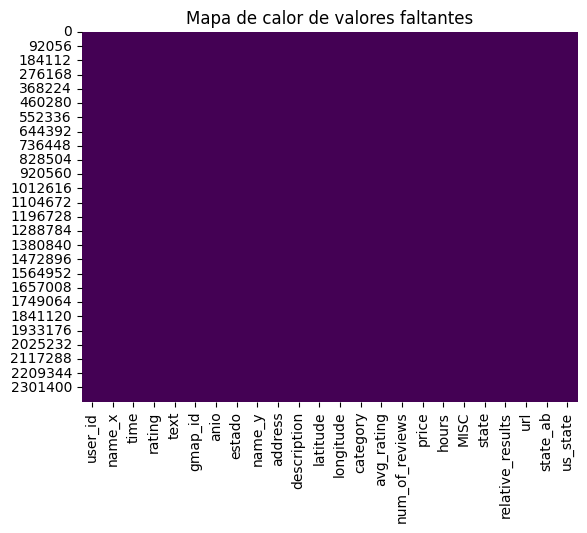

In [19]:
sns.heatmap(df_maps_reviews_mod.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de calor de valores faltantes')
plt.show()

# Comprobar distribucion de los datos

In [20]:
df_yelp_reviews['stars'].describe()

count    558655.000000
mean          3.695087
std           1.545186
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: stars, dtype: float64

La mayoría de las clasificaciones se encuentran en la categoría de 5 estrellas, mientras las clasificaciones de 1 y 2 estrellas son significativamente menores en comparación, lo que sugiere que la mayoría de los usuarios tienden a expresar opiniones muy favorables por encima de las negativas.

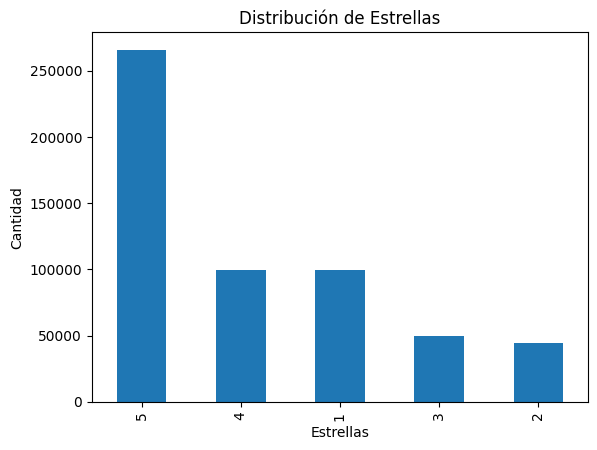

In [21]:
df_yelp_reviews['stars'].value_counts().plot(kind='bar')
plt.title('Distribución de Estrellas')
plt.xlabel('Estrellas')
plt.ylabel('Cantidad')
plt.show()

In [22]:
df_yelp_reviews['funny'].describe()

count    558655.000000
mean          0.171396
std           0.514744
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          43.000000
Name: funny, dtype: float64

Nos indica que casi el 90% de las reseñas carecen de votaciones 'funny'

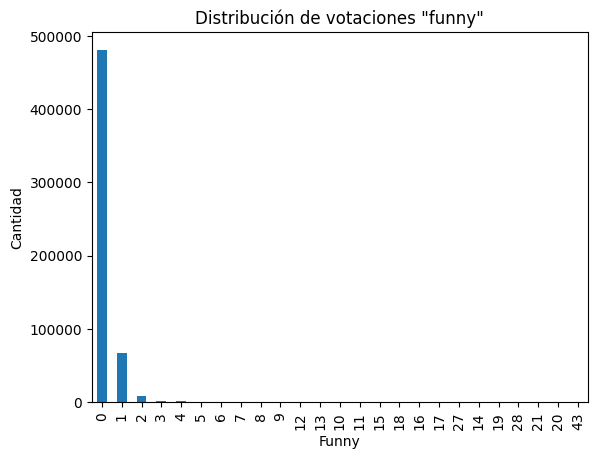

In [23]:
df_yelp_reviews['funny'].value_counts().plot(kind='bar')
plt.title('Distribución de votaciones "funny"')
plt.xlabel('Funny')
plt.ylabel('Cantidad')
plt.show()

In [24]:
df_yelp_reviews['cool'].describe()

count    558655.000000
mean          0.366860
std           0.616285
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          26.000000
Name: cool, dtype: float64

Al rededor del 70% de reseñas no cuentan con votaciones 'cool'

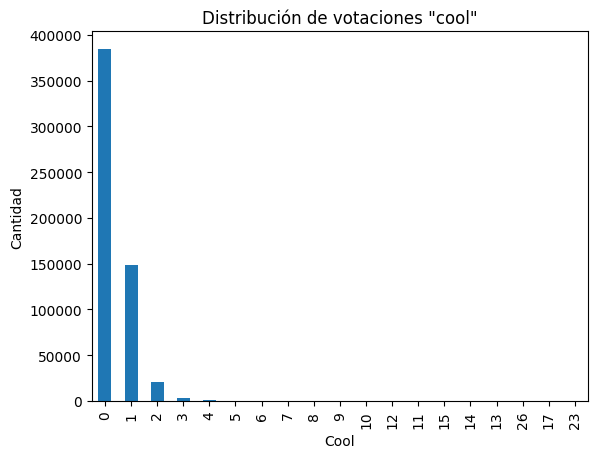

In [25]:
df_yelp_reviews['cool'].value_counts().plot(kind='bar')
plt.title('Distribución de votaciones "cool"')
plt.xlabel('Cool')
plt.ylabel('Cantidad')
plt.show()

In [26]:
df_yelp_users['review_count'].describe()

count    99015.000000
mean       281.001111
std        364.432217
min          1.000000
25%        106.000000
50%        178.000000
75%        325.000000
max      17473.000000
Name: review_count, dtype: float64

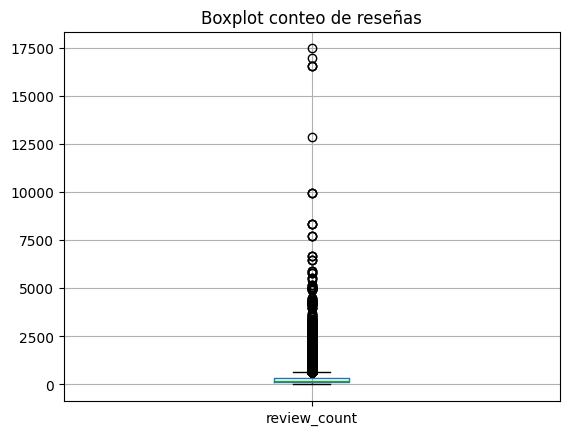

In [27]:
df_yelp_users.boxplot(column='review_count')
plt.title('Boxplot conteo de reseñas')
plt.show()

In [28]:
df_yelp_users['useful'].describe()

count     99015.000000
mean        836.042206
std        3269.671606
min           0.000000
25%         129.000000
50%         269.000000
75%         622.000000
max      206296.000000
Name: useful, dtype: float64

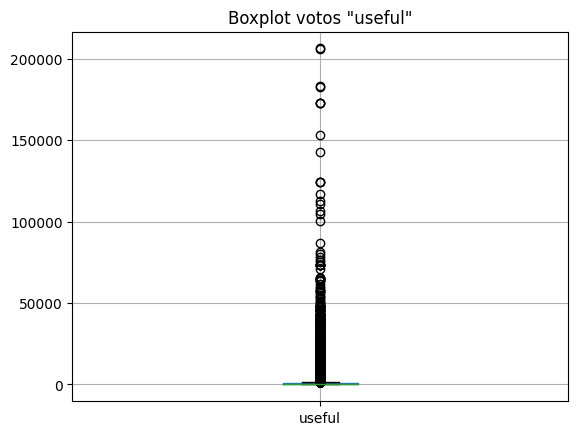

In [29]:
df_yelp_users.boxplot(column='useful')
plt.title('Boxplot votos "useful"')
plt.show()

In [30]:
df_yelp_users['funny'].describe()

count     99015.000000
mean        382.725425
std        2077.998281
min           0.000000
25%          27.000000
50%          72.000000
75%         208.000000
max      185823.000000
Name: funny, dtype: float64

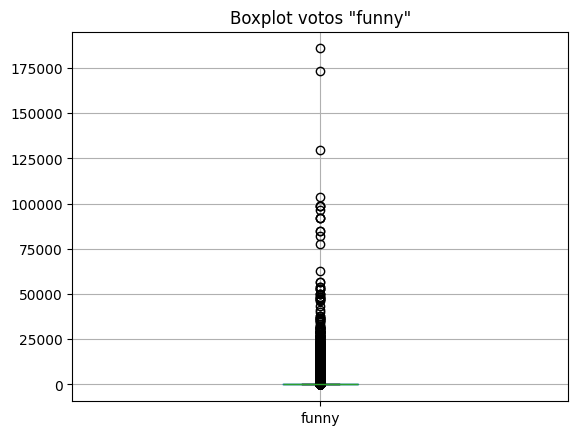

In [31]:
df_yelp_users.boxplot(column='funny')
plt.title('Boxplot votos "funny"')
plt.show()

In [32]:
df_yelp_users['cool'].describe()

count     99015.000000
mean        558.009049
std        2860.711375
min           0.000000
25%          52.000000
50%         117.000000
75%         309.000000
max      199878.000000
Name: cool, dtype: float64

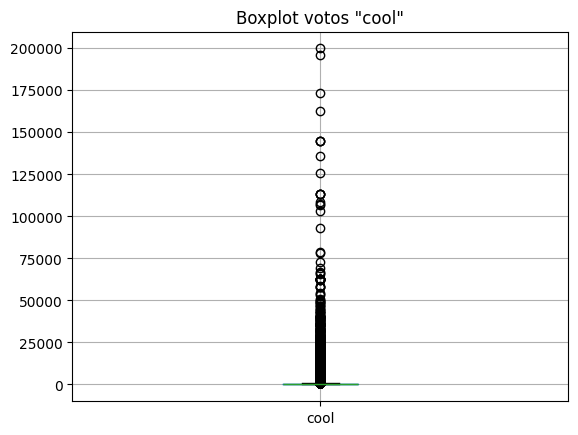

In [33]:
df_yelp_users.boxplot(column='cool')
plt.title('Boxplot votos "cool"')
plt.show()

In [34]:
df_yelp_users['fans'].describe()

count    99015.000000
mean        29.946776
std        107.443318
min          0.000000
25%          5.000000
50%         12.000000
75%         27.000000
max      12497.000000
Name: fans, dtype: float64

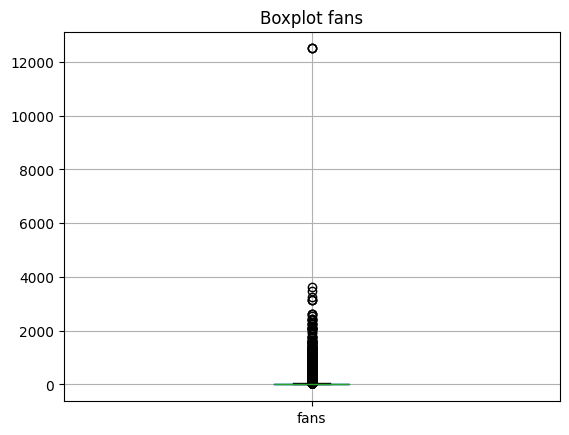

In [35]:
df_yelp_users.boxplot(column='fans')
plt.title('Boxplot fans')
plt.show()

In [36]:
df_yelp_users['average_stars'].describe()

count    99015.000000
mean         3.942432
std          0.347025
min          2.310000
25%          3.710000
50%          3.940000
75%          4.180000
max          5.000000
Name: average_stars, dtype: float64

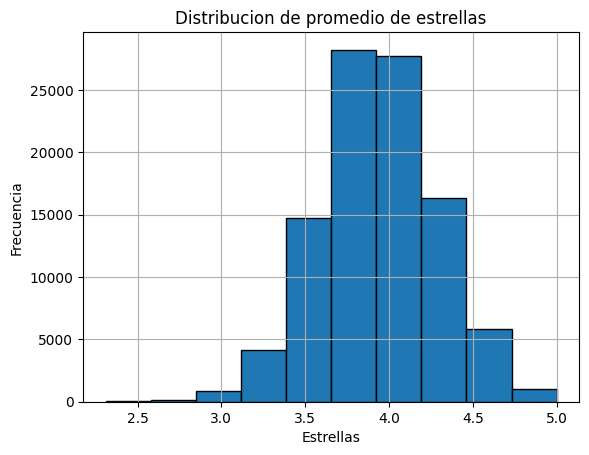

In [37]:
df_yelp_users['average_stars'].hist(bins=10, edgecolor='black')
plt.title('Distribucion de promedio de estrellas')
plt.xlabel('Estrellas')
plt.ylabel('Frecuencia')
plt.show()

In [38]:
df_yelp_users['compliment_hot'].describe()

count    99015.000000
mean        46.490259
std        349.486881
min          0.000000
25%          1.000000
50%          5.000000
75%         16.000000
max      25784.000000
Name: compliment_hot, dtype: float64

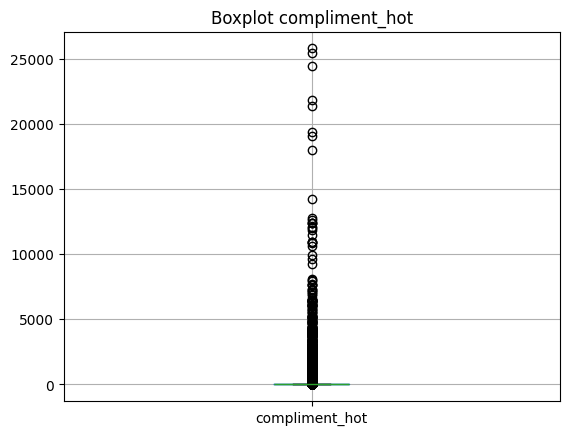

In [39]:
df_yelp_users.boxplot(column='compliment_hot')
plt.title('Boxplot compliment_hot')
plt.show()

In [40]:
df_yelp_users['compliment_more'].describe()

count    99015.000000
mean         6.154977
std         43.253374
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max       4347.000000
Name: compliment_more, dtype: float64

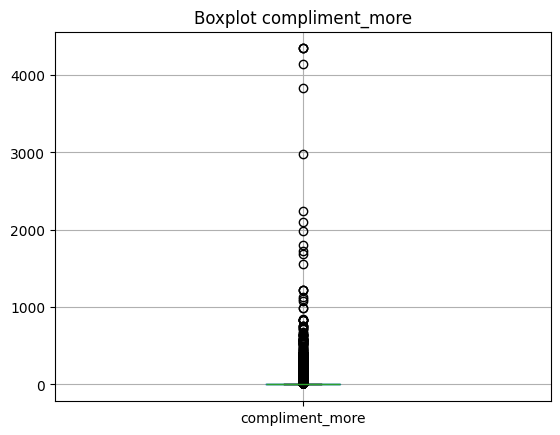

In [41]:
df_yelp_users.boxplot(column='compliment_more')
plt.title('Boxplot compliment_more')
plt.show()

In [42]:
df_yelp_users['compliment_profile'].describe()

count    99015.000000
mean         4.347543
std         58.900780
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max       7039.000000
Name: compliment_profile, dtype: float64

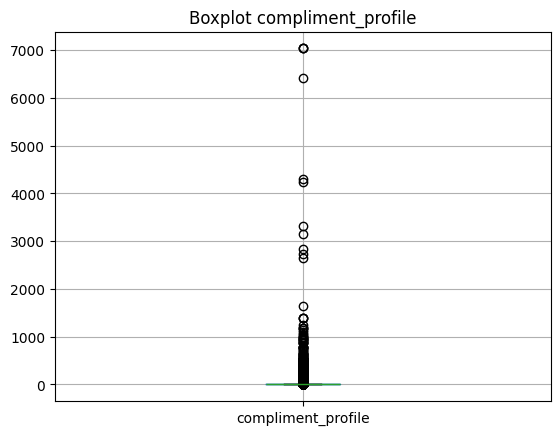

In [43]:
df_yelp_users.boxplot(column='compliment_profile')
plt.title('Boxplot compliment_profile')
plt.show()

In [44]:
df_yelp_users['compliment_cute'].describe()

count    99015.000000
mean         3.225966
std         29.845040
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       2974.000000
Name: compliment_cute, dtype: float64

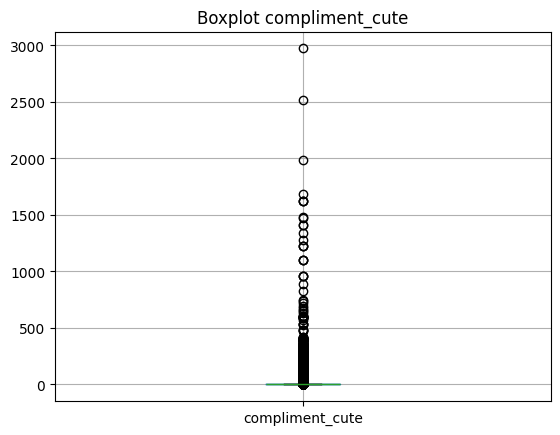

In [45]:
df_yelp_users.boxplot(column='compliment_cute')
plt.title('Boxplot compliment_cute')
plt.show()

In [46]:
df_yelp_users['compliment_list'].describe()

count    99015.000000
mean         1.684826
std         23.612298
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2607.000000
Name: compliment_list, dtype: float64

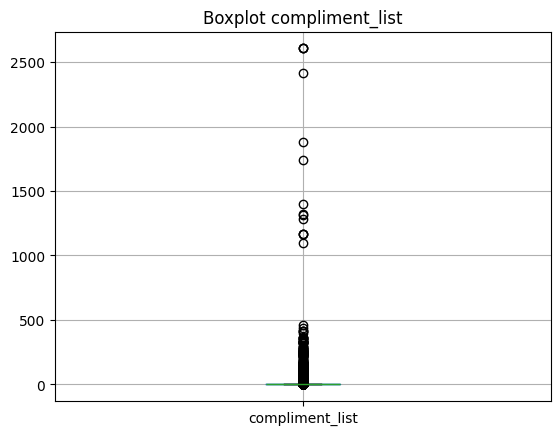

In [47]:
df_yelp_users.boxplot(column='compliment_list')
plt.title('Boxplot compliment_list')
plt.show()

In [48]:
df_yelp_users['compliment_note'].describe()

count    99015.000000
mean        32.722769
std        274.395327
min          0.000000
25%          3.000000
50%          7.000000
75%         18.000000
max      59031.000000
Name: compliment_note, dtype: float64

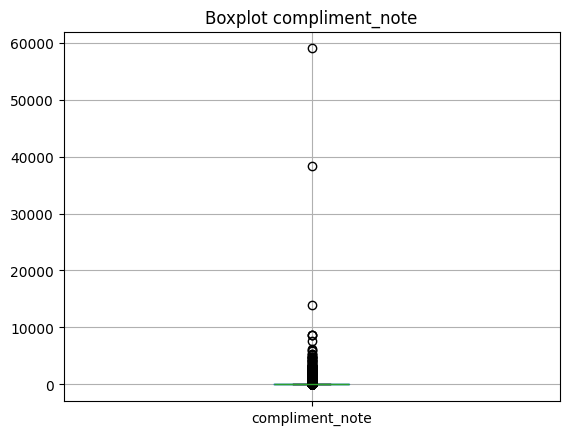

In [49]:
df_yelp_users.boxplot(column='compliment_note')
plt.title('Boxplot compliment_note')
plt.show()

In [50]:
df_yelp_users['compliment_plain'].describe()

count     99015.000000
mean         76.084391
std         614.067347
min           0.000000
25%           4.000000
50%           9.000000
75%          25.000000
max      101097.000000
Name: compliment_plain, dtype: float64

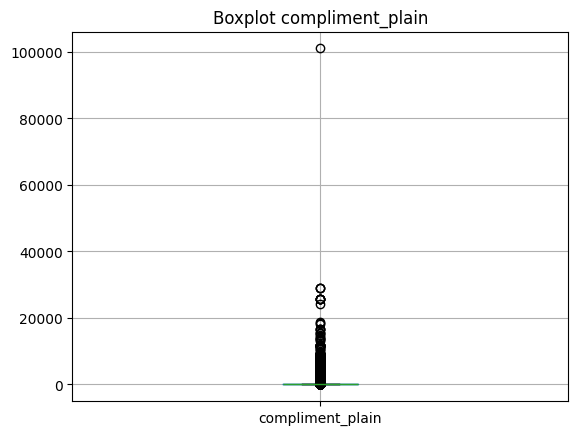

In [51]:
df_yelp_users.boxplot(column='compliment_plain')
plt.title('Boxplot compliment_plain')
plt.show()

In [52]:
df_yelp_users['compliment_cool'].describe()

count    99015.000000
mean        71.561986
std        463.551727
min          0.000000
25%          4.000000
50%         10.000000
75%         29.000000
max      49967.000000
Name: compliment_cool, dtype: float64

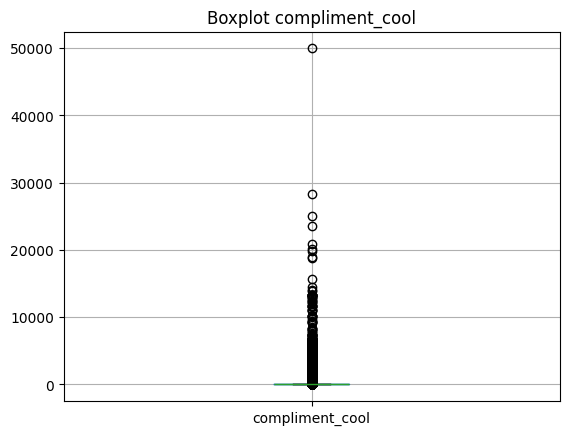

In [53]:
df_yelp_users.boxplot(column='compliment_cool')
plt.title('Boxplot compliment_cool')
plt.show()

In [54]:
df_yelp_users['compliment_funny'].describe()

count    99015.000000
mean        71.561986
std        463.551727
min          0.000000
25%          4.000000
50%         10.000000
75%         29.000000
max      49967.000000
Name: compliment_funny, dtype: float64

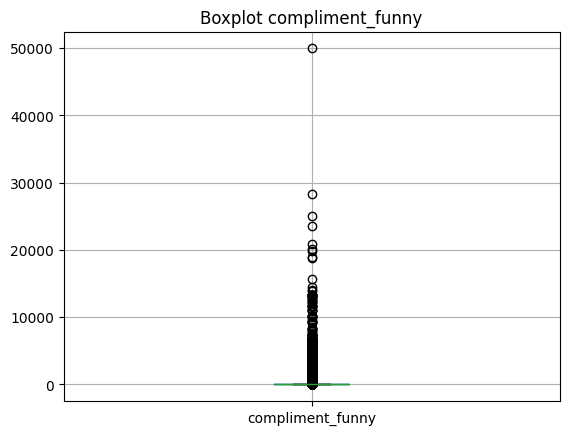

In [55]:
df_yelp_users.boxplot(column='compliment_funny')
plt.title('Boxplot compliment_funny')
plt.show()

In [56]:
df_yelp_users['compliment_writer'].describe()

count    99015.000000
mean        26.784800
std        157.101787
min          0.000000
25%          2.000000
50%          6.000000
75%         16.000000
max      15934.000000
Name: compliment_writer, dtype: float64

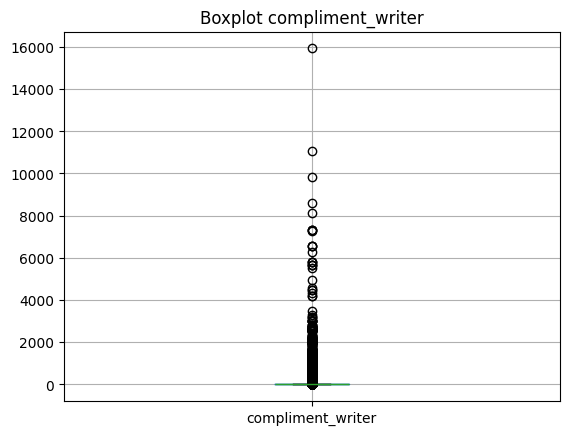

In [57]:
df_yelp_users.boxplot(column='compliment_writer')
plt.title('Boxplot compliment_writer')
plt.show()

In [58]:
df_yelp_users['compliment_photos'].describe()

count    99015.000000
mean        27.894723
std        352.241900
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max      56104.000000
Name: compliment_photos, dtype: float64

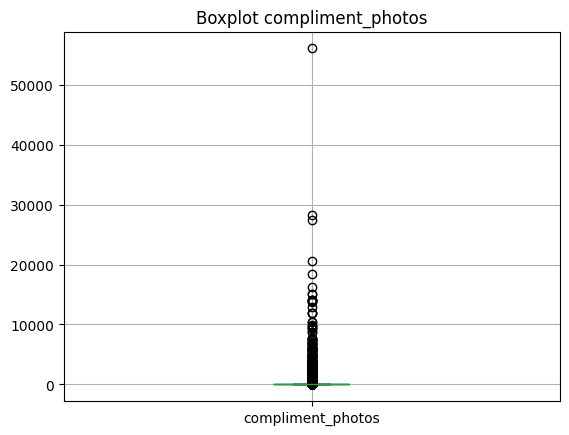

In [59]:
df_yelp_users.boxplot(column='compliment_photos')
plt.title('Boxplot compliment_photos')
plt.show()